<a href="https://colab.research.google.com/github/Sudeep2702/Deep-learning/blob/main/Ann_with_image_classifier_and_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf
import seaborn as sns
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
#installing the keras tuner
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 14.0 MB/s eta 0:00:00


In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:

# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)
(10000, 28, 28)
(10000,)


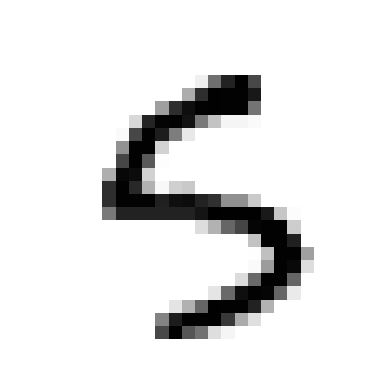

In [ ]:
plt.imshow(X_train[10000],cmap='binary')
plt.axis("off")
plt.show()

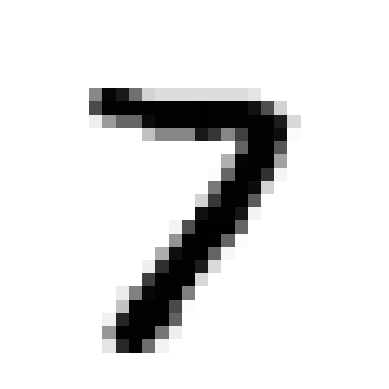

In [ ]:
plt.imshow(X_valid[4000],cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
# Define model building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 0.0001, 0.01, sampling='log')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Define Keras Tuner RandomSearch object
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuning',
    project_name='mnist_ann')

In [ ]:
#search for  best hyper parameters
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 53s]
val_accuracy: 0.9032999873161316

Best val_accuracy So Far: 0.9757999777793884
Total elapsed time: 00h 06m 09s


In [ ]:
#now lets save the model with best hyper parameters

In [ ]:
best_model = tuner.get_best_models(num_models = 1)[0]

In [ ]:
y_pred = best_model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9805
Precision: 0.9805643155409606
Recall: 0.9805
F1 score: 0.9804815563948786


In [ ]:
import time 
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path
                                                                                                                                                                                                                           
  

In [ ]:
best_model.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_04_16_16_57_01_.h5


In [ ]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=best_model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0262 - accuracy: 0.0992 - val_loss: 0.0661 - val_accuracy: 0.0956
Epoch 2/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0273 - accuracy: 0.0991 - val_loss: 0.0692 - val_accuracy: 0.0966
Epoch 3/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0258 - accuracy: 0.0991 - val_loss: 0.0725 - val_accuracy: 0.0952
Epoch 4/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0241 - accuracy: 0.0991 - val_loss: 0.0739 - val_accuracy: 0.0960
Epoch 5/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0221 - accuracy: 0.0989 - val_loss: 0.0635 - val_accuracy: 0.0960


In [ ]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.026218,0.099182,0.066082,0.0956
1,0.027306,0.099055,0.069243,0.0966
2,0.025840,0.099109,0.072469,0.0952
3,0.024088,0.099073,0.073891,0.0960
4,0.022085,0.098927,0.063502,0.0960


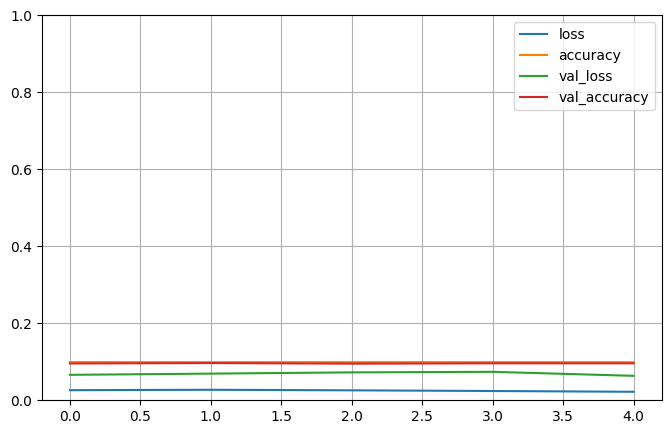

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
best_model.evaluate(X_test,y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 15.2556 - accuracy: 0.0986


0.09860000014305115

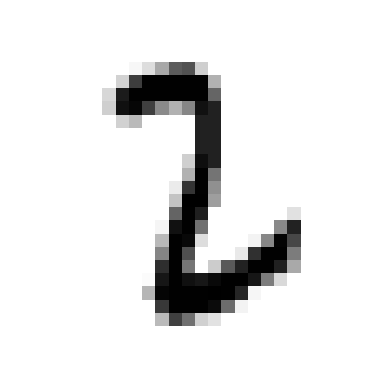

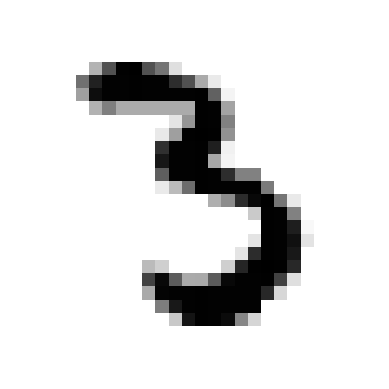

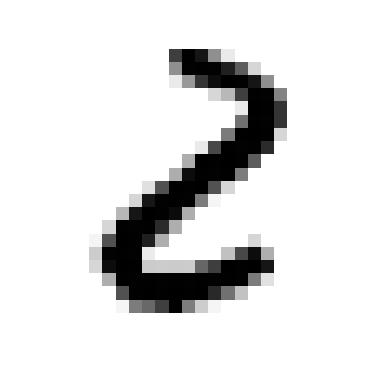

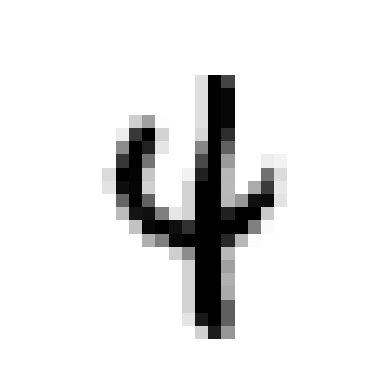

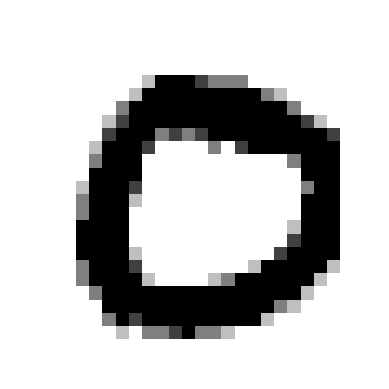

In [ ]:
for i in range(4995,5000):
  plt.imshow(X_test[i],cmap = "binary")
  plt.axis("off")
  plt.show()

In [ ]:
prediction=best_model.predict(X_test[:5000])

157/157 [==============================] - 0s 3ms/step


In [ ]:
y_pred_ = prediction[4998]
np.argmax(y_pred_)

4

In [ ]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.9/dist-packages/tensorflow/__init__.py'>

In [ ]:
from tensorflow.keras.models import load_model

In [94]:
model=load_model("/content/SAVED_MODELS/Model_2023_04_16_16_57_01_.h5")